<div style="float:right;"><ul><li><b>Name:</b>Yash Ketan Kanakia</li><li><b>Roll No: </b>E21027</li></ul></div>

# AIF Assignment 5

1. Test the pipeline with at least 3 other stocks

2. Experiment with various LSTM model parameters (Ex: Use 250 units instead of 50)

In [179]:
#Importing Packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf #For accessing stock price from Yahoo Finance
from sklearn.preprocessing import MinMaxScaler

In [180]:
import tensorflow as tf
print(tf.version.VERSION)

2.3.1


In [181]:
#Reading Stock Price
def accessingSharePrices(shareName):
    stockPrice = yf.download(shareName, start='2000-01-01', end='2007-12-31', progress=False)
    stockPrice.head()
    return stockPrice

In [182]:
#Training Set
def traingSet(df):
    training_set = df.iloc[:, 1:2].values
    return training_set

In [183]:
#Scaling Training Set

def Scaling(training_set):
    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(training_set)
    return training_set_scaled

In [184]:
#Reshaping Scalled Training Set

def trainReshaping(training_set_scaled):
    X_train = []
    y_train = []
    for i in range(60, 2010):
        X_train.append(training_set_scaled[i-60:i, 0])
        y_train.append(training_set_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    
    return X_train, y_train

In [207]:
#LSTM Model 

def LSTMModel(X_train, y_train,epochs_val=10,batchSize=30,zz=50):
    
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import LSTM
    from keras.layers import Dropout
    
    regressor = Sequential()

    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))

    regressor.add(Dense(units = 1))

    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

    regressor.fit(X_train, y_train, epochs = epochs_val, batch_size = batchSize)
    print("***********")
    print("Summary :- ")
    regressor.summary()
    print("***********")
    return regressor

In [208]:
#Test Data

def testSplit(df):
    real_stock_price = df.iloc[:, 1:2].values
    return real_stock_price

In [209]:
#Predicting the opening Price
def predictOnTestData(stockPrice,regressor):
    dataset_total = pd.concat((stockPrice['Open'], stockPrice['Open']), axis = 0)
    inputs = dataset_total[len(dataset_total) - len(stockPrice) - 60:].values
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    X_test = []
    for i in range(60, 2010):
        X_test.append(inputs[i-60:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted_stock_price = regressor.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    return predicted_stock_price

In [210]:
#Visualizaiton
def printGraph(predicted_stock_price,real_stock_price,stockName):
    plt.figure(figsize=(16,5))
    plt.plot(real_stock_price, color = 'black', label = 'Actual Stock Price')
    plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
    title_name = stockName+" Stock Price Prediction"
    plt.title(title_name)
    plt.xlabel('Time')
    plt.ylabel('Actual Stock Price')
    plt.legend()
    plt.show()
    print("----------------------")

In [211]:
#Pipelining of Process
def createBatchProcess(units):
    shareNameList = ['IBM','AAPL','AMZN']   #Using 3 Stocks
    shareName = ['IBM','APPLE','AMAZON']
    
    for i,j in zip(shareNameList,shareName):
        df = accessingSharePrices(i)
        
        data_set = traingSet(df)
        scaled   = Scaling(data_set)
        
        X_train, y_train = trainReshaping(scaled)
        
        model = LSTMModel(X_train, y_train,10,30,units)
        
        rsp   = testSplit(df)
        
        prediction = predictOnTestData(df,model)
        printGraph(prediction,rsp,j)

### Question 1
#### Test the pipeline with at least 3 other stocks

Epoch 1/10
65/65 [==============================] - 7s 105ms/step - loss: 0.0243
Epoch 2/10
65/65 [==============================] - 7s 113ms/step - loss: 0.0079
Epoch 3/10
65/65 [==============================] - 9s 134ms/step - loss: 0.0061
Epoch 4/10
65/65 [==============================] - 9s 135ms/step - loss: 0.0059
Epoch 5/10
65/65 [==============================] - 9s 132ms/step - loss: 0.0053
Epoch 6/10
65/65 [==============================] - 8s 130ms/step - loss: 0.0045
Epoch 7/10
65/65 [==============================] - 9s 134ms/step - loss: 0.0047
Epoch 8/10
65/65 [==============================] - 9s 132ms/step - loss: 0.0046
Epoch 9/10
65/65 [==============================] - 9s 132ms/step - loss: 0.0040
Epoch 10/10
65/65 [==============================] - 9s 132ms/step - loss: 0.0040
***********
Summary :- 
Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_120 (

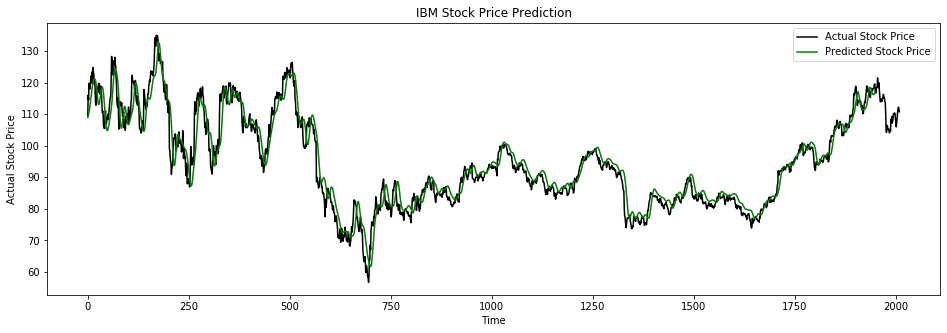

----------------------
Epoch 1/10
65/65 [==============================] - 7s 109ms/step - loss: 0.0073
Epoch 2/10
65/65 [==============================] - 7s 114ms/step - loss: 0.0016
Epoch 3/10
65/65 [==============================] - 7s 111ms/step - loss: 0.0014
Epoch 4/10
65/65 [==============================] - 8s 117ms/step - loss: 0.0013
Epoch 5/10
65/65 [==============================] - 7s 104ms/step - loss: 0.0018
Epoch 6/10
65/65 [==============================] - 6s 98ms/step - loss: 0.0014
Epoch 7/10
65/65 [==============================] - 7s 102ms/step - loss: 0.0016
Epoch 8/10
65/65 [==============================] - 7s 102ms/step - loss: 0.0013
Epoch 9/10
65/65 [==============================] - 7s 101ms/step - loss: 0.0012
Epoch 10/10
65/65 [==============================] - 6s 96ms/step - loss: 0.0010
***********
Summary :- 
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              

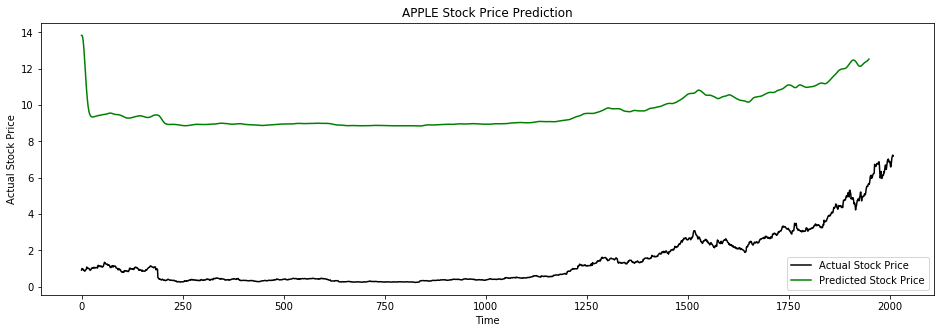

----------------------
Epoch 1/10
65/65 [==============================] - 7s 100ms/step - loss: 0.0181
Epoch 2/10
65/65 [==============================] - 6s 100ms/step - loss: 0.0039
Epoch 3/10
65/65 [==============================] - 7s 106ms/step - loss: 0.0035
Epoch 4/10
65/65 [==============================] - 7s 103ms/step - loss: 0.0033
Epoch 5/10
65/65 [==============================] - 7s 100ms/step - loss: 0.0028
Epoch 6/10
65/65 [==============================] - 7s 107ms/step - loss: 0.0028
Epoch 7/10
65/65 [==============================] - 7s 109ms/step - loss: 0.0023
Epoch 8/10
65/65 [==============================] - 7s 111ms/step - loss: 0.0040
Epoch 9/10
65/65 [==============================] - 9s 134ms/step - loss: 0.0028
Epoch 10/10
65/65 [==============================] - 9s 142ms/step - loss: 0.0024
***********
Summary :- 
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape            

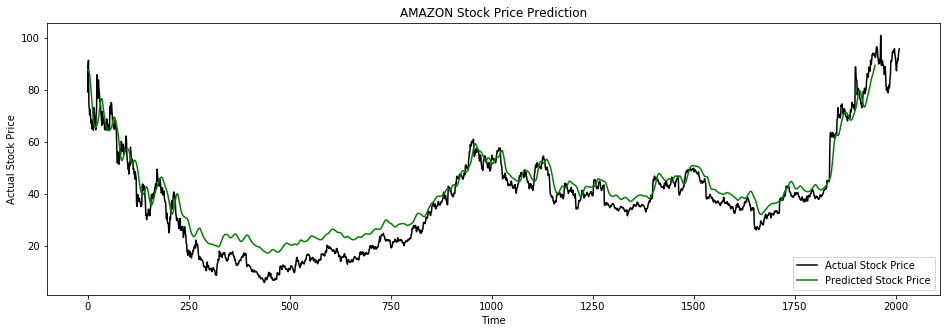

----------------------


In [212]:
createBatchProcess(50)

### Question 2
#### Experiment with various LSTM model parameters (Ex: Use 250 units instead of 50),
####   print out the model summary and retrain the model

Epoch 1/10
65/65 [==============================] - 10s 152ms/step - loss: 0.0257
Epoch 2/10
65/65 [==============================] - 7s 112ms/step - loss: 0.0075
Epoch 3/10
65/65 [==============================] - 7s 107ms/step - loss: 0.0067
Epoch 4/10
65/65 [==============================] - 7s 107ms/step - loss: 0.0064
Epoch 5/10
65/65 [==============================] - 7s 115ms/step - loss: 0.0055
Epoch 6/10
65/65 [==============================] - 7s 112ms/step - loss: 0.0050
Epoch 7/10
65/65 [==============================] - 7s 108ms/step - loss: 0.0050
Epoch 8/10
65/65 [==============================] - 7s 106ms/step - loss: 0.0045
Epoch 9/10
65/65 [==============================] - 8s 131ms/step - loss: 0.0044
Epoch 10/10
65/65 [==============================] - 7s 110ms/step - loss: 0.0042
***********
Summary :- 
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_132 

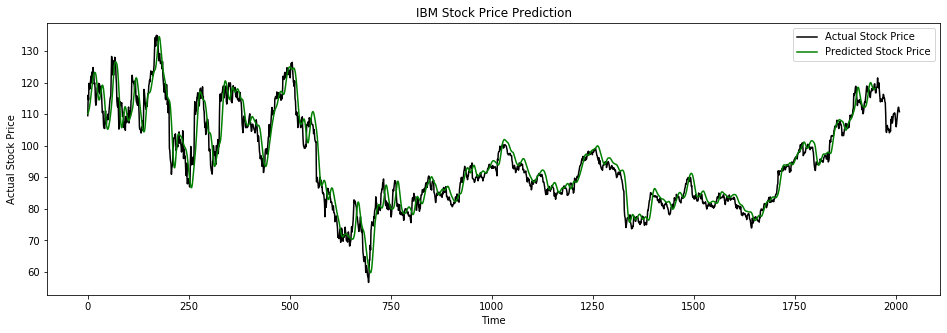

----------------------
Epoch 1/10
65/65 [==============================] - 8s 116ms/step - loss: 0.0072
Epoch 2/10
65/65 [==============================] - 8s 116ms/step - loss: 0.0014
Epoch 3/10
65/65 [==============================] - 8s 124ms/step - loss: 0.0014
Epoch 4/10
65/65 [==============================] - 7s 113ms/step - loss: 0.0015
Epoch 5/10
65/65 [==============================] - 8s 119ms/step - loss: 0.0014
Epoch 6/10
65/65 [==============================] - 7s 106ms/step - loss: 0.0014
Epoch 7/10
65/65 [==============================] - 7s 105ms/step - loss: 0.0012
Epoch 8/10
65/65 [==============================] - 7s 106ms/step - loss: 0.0011
Epoch 9/10
65/65 [==============================] - 7s 110ms/step - loss: 0.0012
Epoch 10/10
65/65 [==============================] - 7s 105ms/step - loss: 0.0011
***********
Summary :- 
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape            

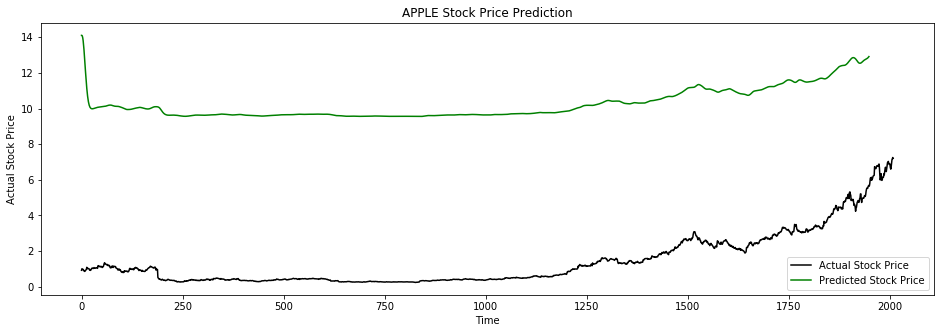

----------------------
Epoch 1/10
65/65 [==============================] - 7s 113ms/step - loss: 0.0135
Epoch 2/10
65/65 [==============================] - 7s 113ms/step - loss: 0.0038
Epoch 3/10
65/65 [==============================] - 7s 113ms/step - loss: 0.0036
Epoch 4/10
65/65 [==============================] - 7s 113ms/step - loss: 0.0035
Epoch 5/10
65/65 [==============================] - 7s 114ms/step - loss: 0.0031
Epoch 6/10
65/65 [==============================] - 7s 108ms/step - loss: 0.0026
Epoch 7/10
65/65 [==============================] - 7s 112ms/step - loss: 0.0029
Epoch 8/10
65/65 [==============================] - 7s 111ms/step - loss: 0.0024
Epoch 9/10
65/65 [==============================] - 7s 110ms/step - loss: 0.0023
Epoch 10/10
65/65 [==============================] - 7s 113ms/step - loss: 0.0026
***********
Summary :- 
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape            

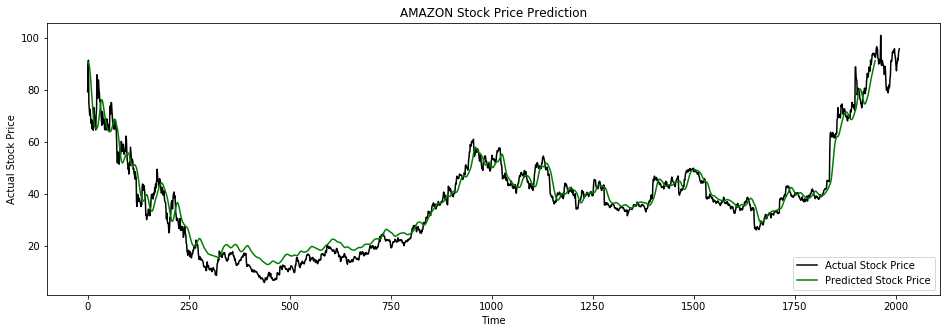

----------------------


In [213]:
createBatchProcess(250)